In [31]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt


In [32]:
import tensorflow as tf
from tensorflow import keras

# Usage:

from keras datasets import fashion_minist

      (x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

Returns: 2 tuples:

  1.x_train,x_test:unint8 array of grayscale image data with shape(num_samples,28,28).
  
  
  2.y_train,y_test:unint8 array of labels(integers in range 0-9) with shape (num_samples).

In [34]:
digit_mnist = keras.datasets.mnist
(X_train_full, y_train_full), (X_test,y_test) = digit_mnist.load_data()

In [5]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
              
              "Sandal","Shirt","Sneakers","Bag","Ankel boot"]

# Data Reshape

In [35]:
X_train_full = X_train_full.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [37]:
X_train_full[1]

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

# Data normalisation

We then normalise the data dimensions so that they are of approximately the same scale. 

In [38]:
X_train_n = X_train_full / 255.

X_test_n = X_test / 255.

# Split the data into train/validation/test datasets

In the earlier step of importing the data, we had 60,000 datasets for training and 10,000 test datasets.Now we further split the training data into train/validation.Here is how each type of datasets is usd in deep learning.

#### Training data-  used for training the model
#### validation data- used for tuning the hyperparameters and evaluate the model
#### Test data - used to test the model after the model has gone through initial vetting by the validation set

In [39]:
X_valid, X_train = X_train_n[:6000], X_train_n[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]
X_test = X_test_n

### create the model architecture

In [41]:
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
model_a=keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters=32, kernel_size = (3,3), strides=1, padding = 'valid', activation='relu',input_shape=(28,28,1)))
model_a.add(keras.layers.MaxPooling2D((2,2)))

model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))

model_b=keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters=32, kernel_size = (3,3), strides=1, padding = 'valid', activation='relu',input_shape=(28,28,1)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                      

In [25]:
model_a.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 300)               1622700   
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                      

In [26]:
model_b.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 flatten_2 (Flatten)         (None, 21632)             0         
                                                                 
 dense_6 (Dense)             (None, 300)               6489900   
                                                                 
 dense_7 (Dense)             (None, 100)               30100     
                                                                 
 dense_8 (Dense)             (None, 10)                1010      
                                                                 
Total params: 6,521,330
Trainable params: 6,521,330
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_a.compile( loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
              
model_b.compile( loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [44]:
model_history = model.fit(X_train, y_train, epochs = 60, batch_size=64, validation_data = (X_valid, y_valid))

Epoch 1/60
844/844 [==============================] - 31s 36ms/step - loss: 0.3825 - accuracy: 0.8900 - val_loss: 0.1956 - val_accuracy: 0.9427
Epoch 2/60
844/844 [==============================] - 30s 36ms/step - loss: 0.1817 - accuracy: 0.9469 - val_loss: 0.1503 - val_accuracy: 0.9548
Epoch 3/60
844/844 [==============================] - 30s 35ms/step - loss: 0.1403 - accuracy: 0.9580 - val_loss: 0.1259 - val_accuracy: 0.9632
Epoch 4/60
844/844 [==============================] - 28s 33ms/step - loss: 0.1167 - accuracy: 0.9654 - val_loss: 0.1087 - val_accuracy: 0.9692
Epoch 5/60
844/844 [==============================] - 30s 35ms/step - loss: 0.0995 - accuracy: 0.9703 - val_loss: 0.1016 - val_accuracy: 0.9702
Epoch 6/60
844/844 [==============================] - 29s 35ms/step - loss: 0.0874 - accuracy: 0.9740 - val_loss: 0.0891 - val_accuracy: 0.9735
Epoch 7/60
844/844 [==============================] - 28s 33ms/step - loss: 0.0775 - accuracy: 0.9775 - val_loss: 0.0834 - val_accuracy:

In [28]:
model_history_a = model.fit(X_train, y_train, epochs = 3, batch_size=64, validation_data = (X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 34s 39ms/step - loss: 0.3260 - accuracy: 0.8817 - val_loss: 0.3609 - val_accuracy: 0.8672
Epoch 2/3
860/860 [==============================] - 31s 36ms/step - loss: 0.3165 - accuracy: 0.8839 - val_loss: 0.3541 - val_accuracy: 0.8686
Epoch 3/3
860/860 [==============================] - 31s 35ms/step - loss: 0.3085 - accuracy: 0.8860 - val_loss: 0.5322 - val_accuracy: 0.8084


In [29]:
model_history_b = model.fit(X_train, y_train, epochs = 3, batch_size=64, validation_data = (X_valid, y_valid))

Epoch 1/3
860/860 [==============================] - 31s 36ms/step - loss: 0.3006 - accuracy: 0.8907 - val_loss: 0.3359 - val_accuracy: 0.8780
Epoch 2/3
860/860 [==============================] - 31s 36ms/step - loss: 0.2930 - accuracy: 0.8925 - val_loss: 0.3340 - val_accuracy: 0.8752
Epoch 3/3
860/860 [==============================] - 31s 36ms/step - loss: 0.2868 - accuracy: 0.8942 - val_loss: 0.4909 - val_accuracy: 0.8244


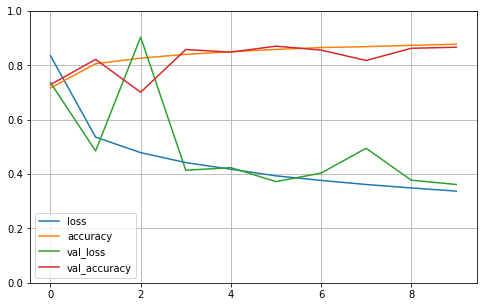

In [16]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [18]:
ev=model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3921 - accuracy: 0.8520


In [19]:
ev

[0.3920925557613373, 0.8519999980926514]

In [20]:
X_new = X_test[:3]

In [21]:
y_pred = model.predict(X_new)
y_pred

1/1 [==============================] - 0s 255ms/step


array([[3.6998685e-05, 2.3925058e-05, 3.3066652e-05, 1.5041057e-05,
        1.8546429e-05, 9.4944807e-03, 1.8575192e-05, 3.7938494e-02,
        2.4909261e-03, 9.4992995e-01],
       [5.6755343e-05, 7.2859524e-07, 9.9436283e-01, 7.2044031e-06,
        8.1809104e-04, 4.4740194e-08, 4.7525563e-03, 1.0141599e-09,
        1.9410686e-06, 5.3370477e-09],
       [1.4524387e-06, 9.9997699e-01, 2.8385926e-07, 1.4929189e-05,
        6.0215921e-06, 8.4912912e-09, 3.1595238e-07, 4.8681065e-10,
        1.5724941e-08, 3.5438241e-09]], dtype=float32)

In [22]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


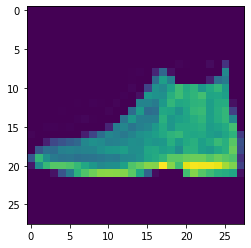

In [23]:
print(plt.imshow(X_test[0].reshape((28,28))))

In [ ]:
keras.backend.clear_session

In [ ]:
del model

In [47]:
str = 'Neural Networks'

In [48]:
str[::-1]

'skrowteN larueN'

In [49]:
import numpy as np
np.arange(0,12,2)

array([ 0,  2,  4,  6,  8, 10])